# Newtonian consitutive model
In this notebook we will apply Bayesian inference on the Newtonian constitutive model ($\eta$=$\eta_0$) using the rheological data obtained through rheological experiments on a shear rheometer. First, we will define the analytical solution for Bayesian inference after which we apply the Metropolis Hastings framework.

The unknown model parameters $\boldsymbol{\theta}$ include the viscosity $\eta$, which leads to $\boldsymbol{\theta}=\left\{ \eta \right\}$. The observations are denoted by $\boldsymbol{y}=\left\{ \boldsymbol{y}_1, ...., \boldsymbol{y}_n \right\}$, where $n$ gives the number of measurements. Each of the vectors $\boldsymbol{y}_i$, include the dependence on the shear rate, because the viscosity measurements are performed for a range of shear rates.
The observed variables can be derived in terms of the model prediction including the total error $\boldsymbol{\varepsilon}$ as,
$\boldsymbol{y}_i=\boldsymbol{d}_i \left( \boldsymbol{\theta} \right) + \boldsymbol{\varepsilon}$. The total error consists of the measurement noise and model bias.
In this example we use data from simple shear measurements to obtain observations for the viscosity. We measured the viscosity as a function of shear rate ten times ($n=10$). First, we determine the noise model based on the standard deviation based on all of the observation because the viscosity is independent of the shear rate in the Newtonian model, thus $\boldsymbol{y}=\left\{ y_1, ..., y_n \right\}$. For the Newtonian model we get
$\eta_i^e = \eta + \varepsilon \quad$ for $1 \leq i \leq n*w$,
where $\eta_i^e$ is the experimentally measured viscosity and $w$ refers to the number of data points per measurement ($w=10$).

Now that we have our model and observations, we can calibrate the model parameter $\eta$ using Bayesian inference. First, we will deriva an analytical solution to obtain the calibrated model parameter, after which we will use the sampling method Metropolis Hastings to determine $\eta$.


### Derivation analytical solution Bayesian inference
Bayesian inference uses Bayes' formula defined as
$P(\boldsymbol{\theta}|\boldsymbol{y}) = \frac{P(\boldsymbol{\theta}) \times L(\boldsymbol{\theta}|\boldsymbol{y})}{P(\boldsymbol{y})}$,
where $P(\boldsymbol{\theta}|\boldsymbol{y})$ is the posterior, $P(\boldsymbol{\theta})$ the prior, $L(\boldsymbol{\theta}|\boldsymbol{y})$ the likelihood and $P(\boldsymbol{y})$ the evidence. In this example we assume the several distributions to be normally distributed. In the analytical solution, we do not have to determine $P(\boldsymbol{y})$ to obtain the mean and standard deviation in the posterior density.

The prior density is defined as
$P(\boldsymbol{\theta}) = \frac{1}{\sqrt{2 \pi} \sigma_{pr}} \exp \left( - \frac{\left(\eta - \overline{\eta}_{pr}\right)^2}{2 \sigma_{pr}^2} \right)$,
where $\overline{\eta}_{pr}$ and $\sigma_{pr}$ are the mean and standard deviation of the prior density.

The likelihood is defined as
$L(\boldsymbol{\theta}|\boldsymbol{y}) = \prod_{i=1}^n L(\eta|\eta_i^e)$
$ \qquad \quad = \prod_{i=1}^n \left( \frac{1}{\sqrt{2 \pi}} \exp \left( - \frac{\left( \eta_i^e - \eta \right)^2}{2 \sigma_{\mathrm{n}}^2} \right) \right)$
$ \qquad \quad = \frac{1}{\sqrt{2 \pi}} \exp \left( - \frac{ \sum_{i=1}^n \left( \eta_i^e - \eta \right)^2}{2 \sigma_{\mathrm{n}}^2} \right)$,
where $\sigma_{\mathrm{n}}$ is the noise.

The posterior density is defined as
$P(\boldsymbol{\theta}|\boldsymbol{y}) = \frac{1}{\sqrt{2 \pi} \sigma_{po}} \exp \left( - \frac{\left(\eta - \overline{\eta}_{po}\right)^2}{2 \sigma_{po}^2} \right)$,
where $\overline{\eta}_{po}$ and $\sigma_{po}$ are the mean and standard deviation of the posterior density.

The posterior density function is proportional to the product of the prior density and the likelihood function, which reads as
$P(\boldsymbol{\theta}|\boldsymbol{y}) \propto P(\boldsymbol{\theta}) \times L(\boldsymbol{\theta}|\boldsymbol{y})$

$\frac{1}{\sqrt{2 \pi} \sigma_{po}} \exp \left( - \frac{\left(\eta - \overline{\eta}_{po}\right)^2}{2 \sigma_{po}^2} \right) \propto \frac{1}{\sqrt{2 \pi} \sigma_{pr}} \exp \left( - \frac{\left(\eta - \overline{\eta}_{pr}\right)^2}{2 \sigma_{pr}^2} \right) \times \frac{1}{\sqrt{2 \pi}} \exp \left( - \frac{ \sum_{i=1}^n \left( \eta_i^e - \eta \right)^2}{2 \sigma_{\mathrm{n}}^2} \right)$

This relation can be simplified to
$\frac{\left(\eta - \overline{\eta}_{po}\right)^2}{2 \sigma_{po}^2} = \frac{\left(\eta - \overline{\eta}_{pr}\right)^2}{2 \sigma_{pr}^2} \times \frac{ \sum_{i=1}^n \left( \eta_i^e - \eta \right)^2}{2 \sigma_{\mathrm{n}}^2}$
$\frac{\left(\eta - \overline{\eta}_{po}\right)^2}{2 \sigma_{po}^2} = \frac{\sigma_{\mathrm{n}}^2 \left( \eta^2 - 2\eta \overline{\eta}_{pr} + \overline{\eta}_{pr}^2 \right) + \sigma_{pr}^2 \sum_{i=1}^n \left( (\eta_i^e)^2 - 2 \eta \eta_i^e + \eta^2 \right)}{2 \sigma_{pr}^2 \sigma_{\mathrm{n}}^2}$
We only need to incorporate the terms that are dependent on $\eta$, therefore, we get rid of $\overline{\eta}_{pr}^2$ and $(\sigma_{pr}^2 \sum_{i=1}^n \eta_i^e)^2$. To determine $\overline{\eta}_{po}$ and $\sigma_{po}$, we must write the right-handside of the equation as
$a\left( \eta - \frac{b}{a} \right)^2$,
where $\overline{\eta}_{po}=\frac{b}{a}$ and $\sigma_{po}=a$.

To define $a$ and $b$ we rewrite the equation as
$a\eta^2 - 2b\eta$, which reads as
$\frac{\left(\eta - \overline{\eta}_{po}\right)^2}{2 \sigma_{po}^2} = \eta^2 \left( \frac{\sigma_{\mathrm{n}}^2 + \sigma_{pr}^2}{2 \sigma_{pr}^2 \sigma_{\mathrm{n}}^2} \right) - 2 \eta \left( \frac{\sigma_{\mathrm{n}}^2 \overline{\eta}_{pr} + \sigma_{pr}^2 \sum_{i=1}^n \eta_i^e}{2 \sigma_{pr}^2 \sigma_{\mathrm{n}}^2} \right)$.
From this we obtain the expressions for $\overline{\eta}_{po}$ and $\sigma_{po}$, given by
$\overline{\eta}_{po} = \frac{\sigma_{\mathrm{n}}^2 \overline{\eta}_{pr} + \sigma_{pr}^2 \sum_{i=1}^n \eta_i^e}{\sigma_{\mathrm{n}}^2 + \sigma_{pr}^2 \sum_{i=1}^n 1}$,
$\sigma_{po} = \sqrt{\frac{\sigma_{pr}^2 \sigma_{\mathrm{n}}^2}{\sigma_{pr}^2 \sum_{i=1}^n 1 + \sigma_{\mathrm{n}}^2}}$


From here, we apply Bayesian inference to calibrate the model parameter $\eta$ analytically as well as numerically, starting with the former.

In [82]:
import numpy, glob, pandas
import matplotlib.pyplot as plt
import scipy.stats

First, we develop the noise model based on the measurement data.

In [105]:
case = "rheometerGly/"
## consider all measurement files
# all_files = glob.glob(case + "*.csv")
# γpoints = []
# ηpoints = []
# for filename in all_files:
#     datafile = pandas.read_csv(filename)
#     γpointstemp = datafile['rate'].to_numpy()
#     ηpointstemp = datafile['eta'].to_numpy()
#
#     γpoints.append(γpointstemp)
#     ηpoints.append(ηpointstemp)
#
# γpoints = numpy.array(γpoints).T
# ηpoints = numpy.array(ηpoints).T
# npoints = ηpoints.size
#
# # Determine noise model
# sigma_noise = numpy.std(ηpoints)
# eta_e_arr = ηpoints.reshape(1,npoints)
# eta_e = eta_e_arr.tolist()

## consider one measurement file
# filename = case + "SRST_S2.csv"
# datafile = pandas.read_csv(filename)
# rate = datafile['rate'].to_numpy()
# eta_e_tot = datafile['eta'].to_numpy()
# eta_e = eta_e_tot[:10]

## consider one point in every measurement file
datapoint = 10
all_files = glob.glob(case + "*.csv")
ηpoints = []
for filename in all_files:
    datafile = pandas.read_csv(filename)
    ηpointstemp = datafile['eta'].to_numpy()
    ηpoints.append(ηpointstemp[datapoint - 1])

eta_e = numpy.array(ηpoints).T
sigma_noise = numpy.std(eta_e)
npoints = eta_e.size
print("noise =",sigma_noise)
# print("n*w viscosity data points =", eta_e)
print("Number of data points =", npoints)

noise = 0.05513643945704147
Number of data points = 10


In [106]:
## Definition of the prior density
def prior(param, sigma_pr, mu_pr):
    return 1 / (numpy.sqrt(2 * numpy.pi) * sigma_pr) * numpy.exp(- (param - mu_pr)**2/(2 * sigma_pr**2))

In [107]:
## Definition of the Likelihood function
def likelihood(param, sigma_noise, eta_e, nsamples):
    sr = numpy.ones_like(eta_e)
    return 1 / (numpy.sqrt(2 * numpy.pi) * sigma_noise)**nsamples * numpy.exp(- (numpy.sum((eta_e - sr*param)**2))/(2 * sigma_noise**2))

In [108]:
def posterior(sigma_pr, mu_pr, sigma_noise, eta_e):
    sr = numpy.ones_like(eta_e)
    mu_post = (sigma_noise**2 * mu_pr + sigma_pr**2 * numpy.sum(eta_e))/(sigma_noise**2 + sigma_pr**2* numpy.sum(sr))
    sigma_post = numpy.sqrt((sigma_pr**2 * sigma_noise**2)/(sigma_noise**2 + sigma_pr**2 * numpy.sum(sr)))
    return mu_post, sigma_post

In [109]:
# Check values for mean and standard deviation of the posterior density
sigma_pr = 0.2
mu_pr = 1.4

mu_post = numpy.zeros(npoints)
sigma_post = numpy.zeros(npoints)
for i in range(npoints):
    mu_post[i], sigma_post[i] = posterior(sigma_pr, mu_pr, sigma_noise, eta_e[:i+1]) # als meerdere sets data, eta_e[0][:i+1]
print(mu_post)




[1.00699839 0.97063116 0.9248213  0.90118997 0.87859345 0.8808279
 0.88059784 0.8855362  0.87911419 0.8795574 ]


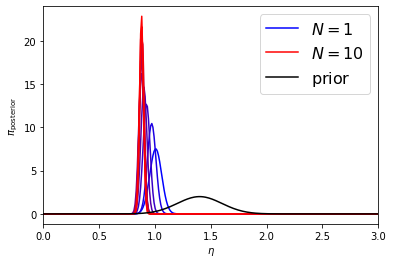

In [110]:
# Compute the posterior density analytically
eta_vec = numpy.linspace(0,5,500)
d_eta = (eta_vec[-1]-eta_vec[0])/len(eta_vec)
post = numpy.zeros([npoints, len(eta_vec)])

prior_vec = numpy.exp( -(eta_vec-mu_pr)**2 / (2*sigma_pr**2) )
fac = 1.0/(sum(d_eta*prior_vec)) # scale with an estimate of the area
prior_vec = fac*prior_vec

for i in range(npoints):
    post[i,:] = numpy.exp(-(eta_vec - mu_post[i])**2/(2*sigma_post[i]**2))
    fac = 1.0/(sum(d_eta*post[i,:])) # scale with an estimate of the area
    post[i,:] = fac*post[i,:]

    # set the color of the line to plot
    if npoints == 1:
        color = (1,0,0)
    else:
        color = (i/(npoints-1),0,1-i/(npoints-1)) # gradient in color

    # # only add labels to the first and last line
    if i == 0 or i == npoints-1:
        plt.plot(eta_vec,post[i,:],label='$N = '+str(i+1)+'$',color=color)
    else:
        plt.plot(eta_vec,post[i,:],color=color)

# add the prior and the real value to the plot
plt.plot(eta_vec,prior_vec,'k',label='$\\mathrm{prior}$')
plt.xlabel("$\\eta$")
plt.ylabel("$\\pi_\\mathrm{posterior}$")
plt.legend( prop={'size': 16})
plt.xlim([0, 3])
plt.show()

In [111]:
# Compute the posterior predictive prediction
mu_ppd = mu_post[-1]
sd_ppd = numpy.sqrt(sigma_post[-1]**2+sigma_noise**2)





Next, we will incorporate the MCMC metropolis hastings algorithm and compare it with the analytically obtained posterior density. For the numerical method, we use the logprior and loglikelihood.

In [112]:
def logprior(param, mean, sd):
    return - numpy.log(1/(numpy.sqrt(2 * numpy.pi) * sd)) - (param - mean)**2/(2 * sd**2)

def loglikelihood(param, sd, data, npoints):
    param = numpy.ones_like(data)*param
    return - (npoints/2) * numpy.log(2 * numpy.pi) - npoints * numpy.log(sd) - (numpy.sum((data - param)**2))/(2 * sd**2)

In [115]:
xp = 1.5
ns = 5000
gamma = 0.1 # bepaald de breedte van de proposal distribution --> probeer een acceptance ratio van 0.2 - 0.25 te krijgen
xp_all = numpy.zeros(ns)
xp_all[0] = xp

accept = 0
for i in range(ns):
    xi = numpy.random.normal(xp, gamma)
    prob = numpy.exp(logprior(xi, mu_pr, sigma_pr) + loglikelihood(xi, sigma_noise, eta_e, npoints) - logprior(xp, mu_pr, sigma_pr) - loglikelihood(xp, sigma_noise, eta_e, npoints))

    if prob > numpy.random.uniform(0,1):
        xp = xi
        accept += 1

    xp_all[i] = xp

burnin = int(ns/3)
posterior = xp_all[burnin:]

print("MCMC")
print(posterior.mean(axis=0))
print(posterior.std(axis=0))

print("Analytical:")
print(mu_post[-1])
print(sigma_post[-1])

print("Acceptance:")
print(100*accept/ns,'%')

MCMC
0.8805617610697433
0.01707943953042803
Analytical:
0.879557398841432
0.01736979221772568
Acceptance:
21.3 %


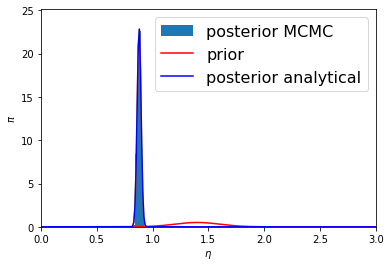

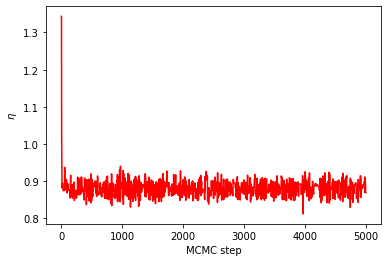

In [118]:
# post-processing
# plot the histogram of the MCMC
plt.figure(0)
plt.hist(posterior, 20, density=True, label='posterior MCMC')
plt.plot(eta_vec,post[-1,:])

xx=numpy.linspace(0,5,1000)

plt.plot(xx,numpy.exp(logprior(xx,mu_pr,sigma_pr)),'r',label='prior')
plt.plot(eta_vec,post[-1,:],'b',label='posterior analytical')
plt.xlim([0., 3.0])
ymax = numpy.max(post[-1,:])*1.1
plt.ylim([0,ymax])
plt.xlabel("$\\eta$")
plt.ylabel("$\\pi$")
plt.legend( prop={'size': 16})
plt.show()

plt.figure(1)
plt.plot(xp_all,'r')
plt.xlabel("MCMC step")
plt.ylabel("$\\eta$")
plt.show()